# SpaCy Introduction for NLP

In [1]:
# !pip install -U spacy

In [2]:
# !pip install -U spacy-lookups-data

In [3]:
# !python -m spacy download en_core_web_sm

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. 

It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

## Features 

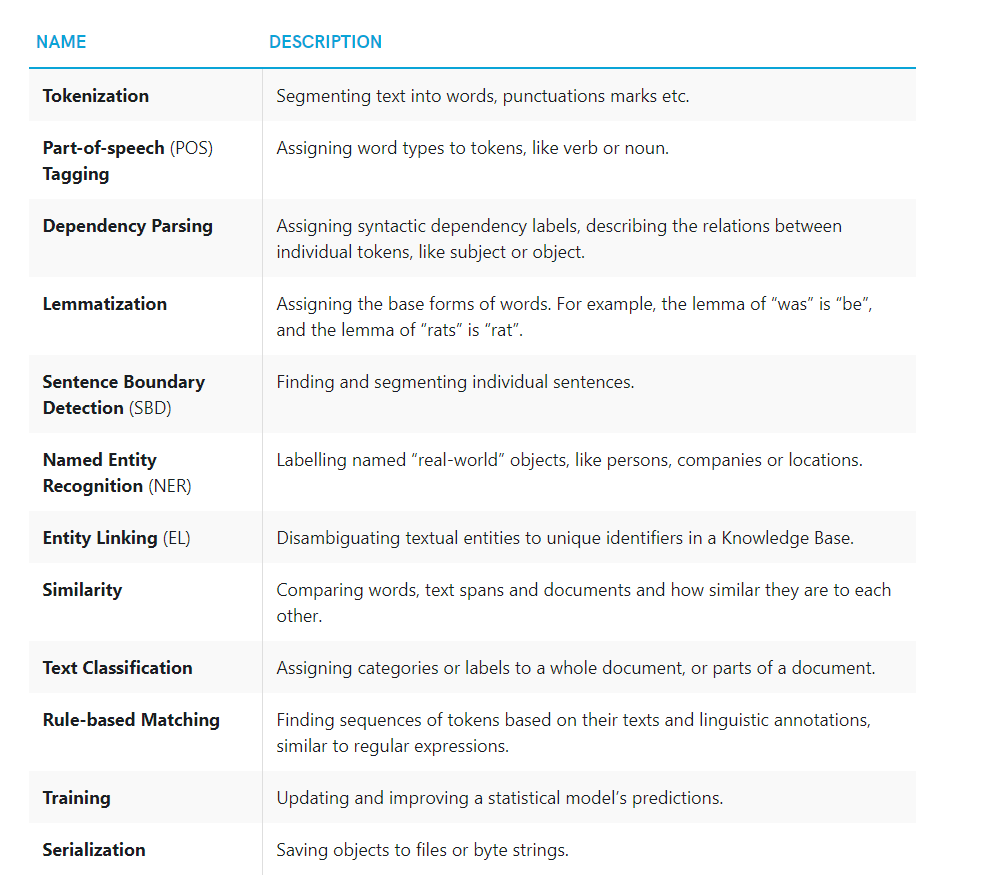

## How Spacy Works 

Example 1: "Apple is looking at buying U.K. startup for $1 billion"

Example 2: "Ishu ate the Apple"

Spacy Models: https://spacy.io/models/en

Processing raw text intelligently is difficult: most words are rare, and it’s common for words that look completely different to mean almost the same thing. 
```
That’s exactly what spaCy is designed to do: you put in raw text, and get back a Doc object, that comes with a variety of annotations.```

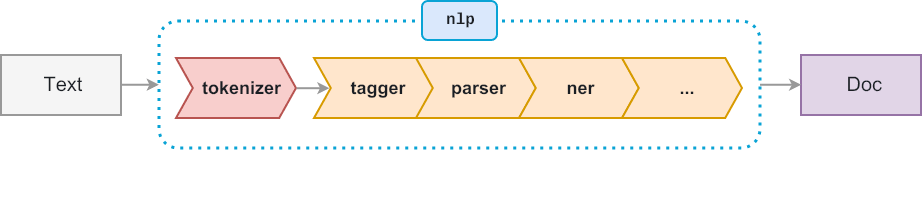

## Tokenization

Tokenization is the task of splitting a text into meaningful segments, called tokens. The input to the tokenizer is a unicode text, and the output is a Doc object. 

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
# help(nlp)

In [4]:
text = 'Apple is looking for buying a U.K. startup for $1 billion'

In [5]:
doc = nlp(text)

In [6]:
# help(doc)

In [7]:
for token in doc:
    print(token.text)

Apple
is
looking
for
buying
a
U.K.
startup
for
$
1
billion


## Parts of Speech [POS] Tagging 

https://spacy.io/api/annotation#pos-tagging

In [8]:
doc

Apple is looking for buying a U.K. startup for $1 billion

In [9]:
for token in doc:
    print(token.text, token.pos_)

Apple PROPN
is AUX
looking VERB
for ADP
buying VERB
a DET
U.K. PROPN
startup NOUN
for ADP
$ SYM
1 NUM
billion NUM


In [10]:
for token in doc:
    print(f'{token.text:{15}} {token.pos_:}')

Apple           PROPN
is              AUX
looking         VERB
for             ADP
buying          VERB
a               DET
U.K.            PROPN
startup         NOUN
for             ADP
$               SYM
1               NUM
billion         NUM


## Visualization 

In [11]:
from spacy import displacy

In [12]:
doc

Apple is looking for buying a U.K. startup for $1 billion

In [13]:
displacy.render(doc, style = 'dep', options = {'distance': 100, 'compact': True})

## Named Entity Recognition `NER`

https://spacy.io/api/annotation#named-entities

In [14]:
doc

Apple is looking for buying a U.K. startup for $1 billion

In [15]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [16]:
doc = nlp('Apple is looking for buying a UK startup for $1 billion in 2020')
displacy.render(doc, style = 'ent')

## Sentence Segmentation 

In [17]:
text = 'Apple is looking for buying a U.K. startup. Government has given permission.'

In [18]:
doc = nlp(text)

In [19]:
doc

Apple is looking for buying a U.K. startup. Government has given permission.

In [20]:
for sent in doc.sents:
    print(sent)


Apple is looking for buying a U.K. startup.
Government has given permission.


## Phrase Matching 

Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find you the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. 

This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents.


#### Token-based matching 

spaCy features a rule-matching engine, the `Matcher`, that operates over tokens, similar to regular expressions. 

The rules can refer to token annotations (e.g. the token text or tag_, and flags (e.g. IS_PUNCT). 

The rule matcher also lets you pass in a custom callback to act on matches – for example, to merge entities and apply custom labels. 

You can also associate patterns with entity IDs, to allow some basic entity linking or disambiguation. To match large terminology lists, you can use the `PhraseMatcher`, which accepts Doc objects as match patterns.

##### Adding patterns

1. A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
2. A token whose `is_punct` flag is set to `True`, i.e. any punctuation.
3. A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.

`[{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]`

When writing patterns, keep in mind that each dictionary represents one token. If spaCy’s tokenization doesn’t match the tokens defined in a pattern, the pattern is not going to produce any results. When developing complex patterns, make sure to check examples against spaCy’s tokenization

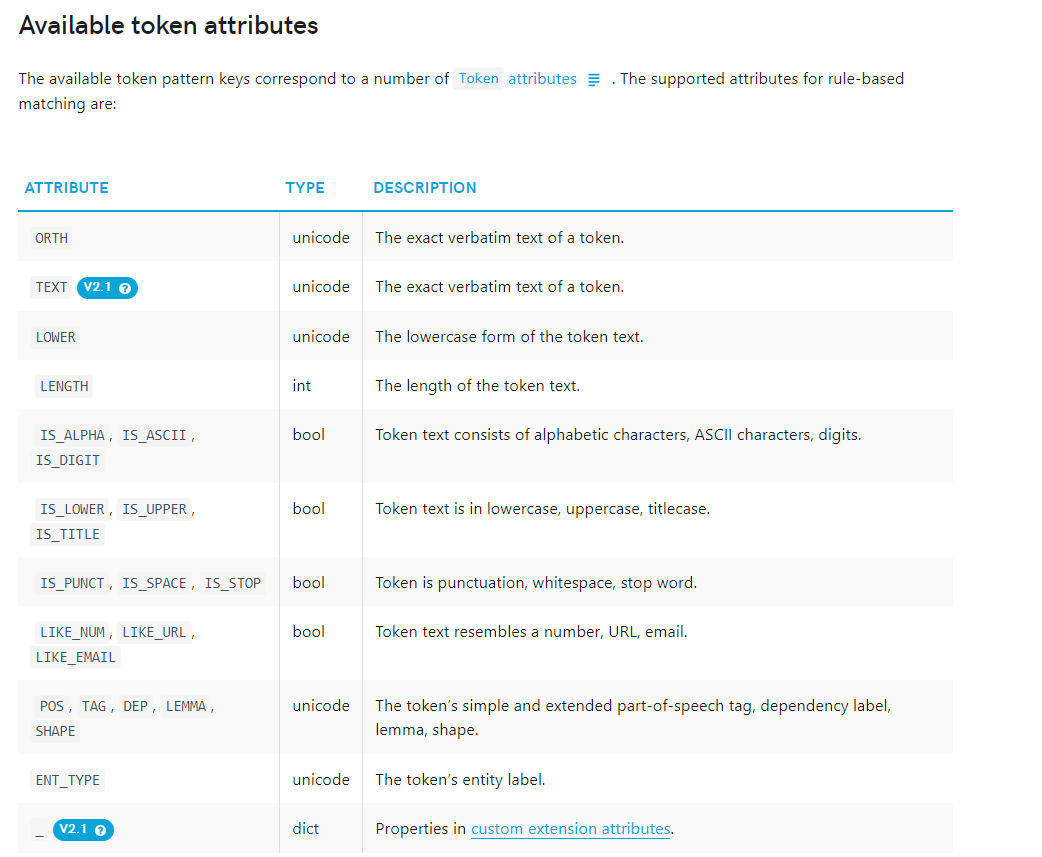

In [21]:
from spacy.matcher import Matcher
from spacy.tokens import Span

In [22]:
text = 'Hello, world! hello world'

In [23]:
doc = nlp(text)

In [24]:
for token in doc:
    print(token)

Hello
,
world
!
hello
world


In [25]:
pattern = [{'LOWER': 'hello'}, {'IS_PUNCT': True, 'OP': '?'}, {'LOWER': 'world'}]

In [26]:
matcher = Matcher(nlp.vocab)
matcher.add('hw', None, pattern)

In [27]:
matches = matcher(doc)

In [28]:
matches

[(17790654416186116455, 0, 3), (17790654416186116455, 4, 6)]

In [29]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(match_id, string_id, start, end, span.text)

17790654416186116455 hw 0 3 Hello, world
17790654416186116455 hw 4 6 hello world


In [30]:
text

'Hello, world! hello world'

## Regular Expression

A regular expression is a sequence of characters that define a search pattern. Usually such patterns are used by string searching algorithms for "find" or "find and replace" operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory.

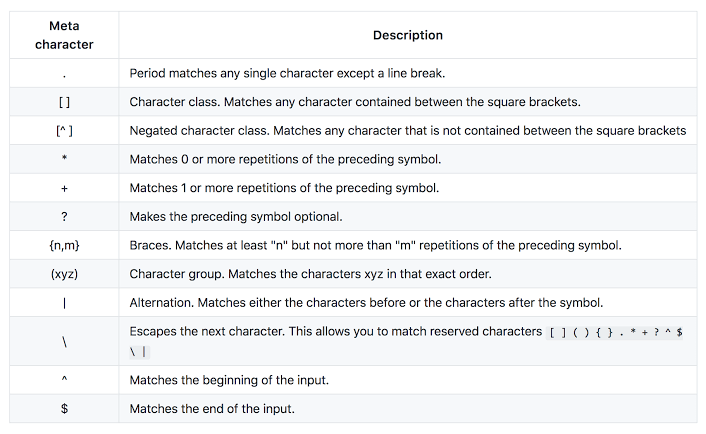

### Identifiers 

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

### Quantifiers


<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

### Example

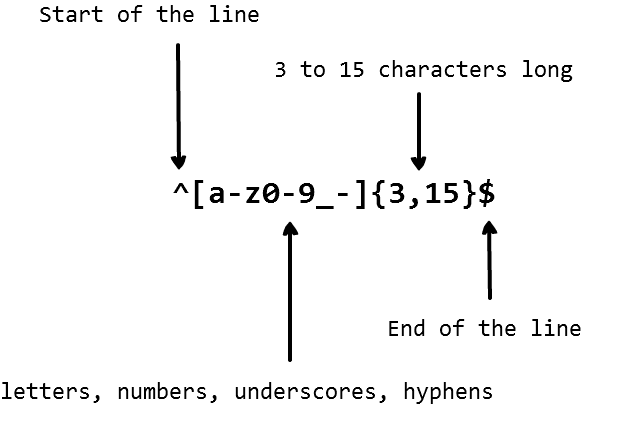

In [31]:
text = 'my phone number is 123. ohh its wrong one. correct one is 1234567890. call me'

In [32]:
import re

In [33]:
re.search(r'\d{3, 10}', text)

In [34]:
re.findall(r'\d+', text)

['123', '1234567890']

In [35]:
re.findall(r'\w+', text)

['my',
 'phone',
 'number',
 'is',
 '123',
 'ohh',
 'its',
 'wrong',
 'one',
 'correct',
 'one',
 'is',
 '1234567890',
 'call',
 'me']

## Wildcard and Exclusion Matching

In [36]:
text

'my phone number is 123. ohh its wrong one. correct one is 1234567890. call me'

In [37]:
re.findall(r'c...', text)

['corr', 'ct o', 'call']

In [38]:
re.findall(r'c.l', text)

['cal']

In [39]:
re.findall(r'2.+', text)

['23. ohh its wrong one. correct one is 1234567890. call me']

In [40]:
re.findall(r'[^\d]+', text)

['my phone number is ', '. ohh its wrong one. correct one is ', '. call me']

In [41]:
re.findall(r'[^\D]+', text)

['123', '1234567890']

## Processing Pipeline in Spacy 

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline.

The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

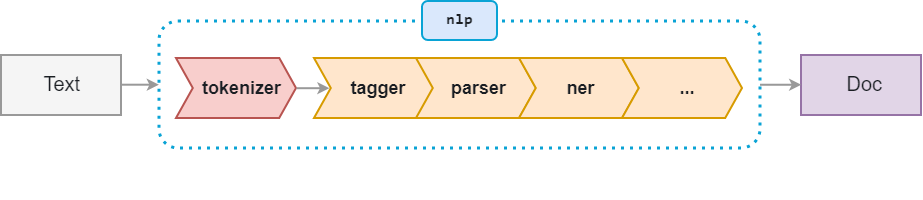

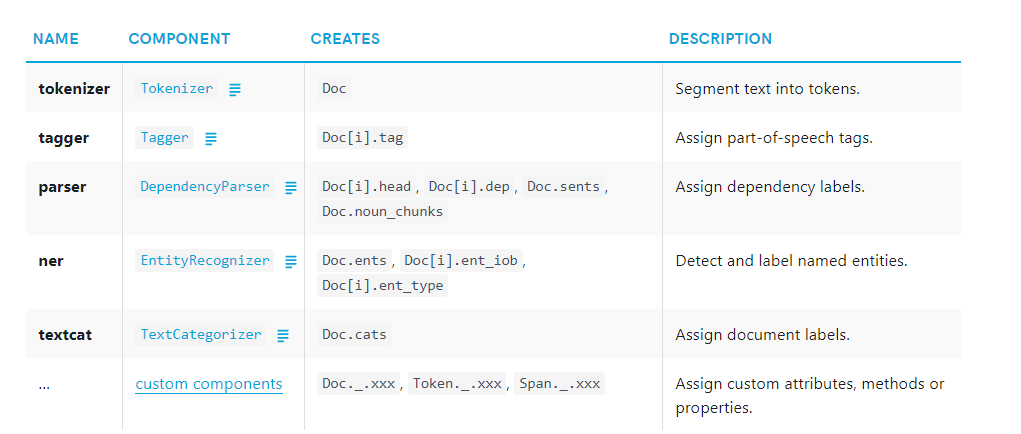

#### Processing text 

When you call nlp on a text, spaCy will tokenize it and then call each component on the Doc, in order. It then returns the processed Doc that you can work with.

#### Tips for efficient processing 
- Process the texts as a stream using nlp.pipe and buffer them in batches, instead of one-by-one. This is usually much more efficient.
- Only apply the pipeline components you need. Getting predictions from the model that you don’t actually need adds up and becomes very inefficient at scale. To prevent this, use the disable keyword argument to disable components you don’t need 

In this example, we’re using nlp.pipe to process a (potentially very large) iterable of texts as a stream. Because we’re only accessing the named entities in doc.ents (set by the ner component), we’ll disable all other statistical components (the tagger and parser) during processing. nlp.pipe yields Doc objects, so we can iterate over them and access the named entity predictions:

In [43]:
import spacy

In [44]:
texts = ['net income was $9.4 million compared to the prior year of 2.7$ million',
        'revenue exceeds twelve billion dollars with a loss of $1b']

In [45]:
nlp = spacy.load('en_core_web_sm')

In [47]:
%%timeit
docs = nlp.pipe(texts, disable = ['tagger', 'parser'])

for doc in docs:
    for ent in doc.ents:
        print(ent.text, ent.label_)
    print()

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
t


$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY


$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
t

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
t

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
t

1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 milli

2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY



$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
t

the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE


In [48]:
%%timeit
docs = nlp.pipe(texts)

for doc in docs:
    for ent in doc.ents:
        print(ent.text, ent.label_)
    print()

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
the prior year DATE
2.7$ million MONEY

twelve billion dollars MONEY
1b MONEY

$9.4 million MONEY
t

## Hashtags and Emoji Detection

Social media posts, especially tweets, can be difficult to work with. They’re very short and often contain various emoji and hashtags. By only looking at the plain text, you’ll lose a lot of valuable semantic information.

In [49]:
pos_emoji = ["😀", "😃", "😂", "🤣", "😊", "😍"]  # Positive emoji
neg_emoji = ["😞", "😠", "😩", "😢", "😭", "😒"]  # Negative emoji

In [52]:
pos = [[{'ORTH': emoji}] for emoji in pos_emoji]
neg = [[{'ORTH': emoji}] for emoji in neg_emoji]

In [53]:
neg

[[{'ORTH': '😞'}],
 [{'ORTH': '😠'}],
 [{'ORTH': '😩'}],
 [{'ORTH': '😢'}],
 [{'ORTH': '😭'}],
 [{'ORTH': '😒'}]]

In [55]:
matcher = Matcher(nlp.vocab)

In [57]:
def label_sentiment(matcher, doc, i , matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id]== 'happy':
        doc.sentiment += 0.1
    elif doc.vocab.strings[match_id] == 'sad':
        doc.sentiment -= 0.1

In [58]:
matcher.add("happy", label_sentiment, *pos)

In [59]:
matcher.add("sad", label_sentiment, *neg)

In [60]:
matcher.add('HASHTAG', None, [{'TEXT': '#'}, {'IS_ASCII': True}])

In [61]:
doc = nlp('Hello guys 😀😂 #kgptalkie')

In [62]:
matches = matcher(doc)

In [63]:
for match_id, starts, end in matches:
    string_id = doc.vocab.strings[match_id]
    span = doc[start:end]
    print(string_id, span.text)

happy 
happy 
HASHTAG #kgptalkie


In [64]:
doc.sentiment

0.20000000298023224